<a href="https://colab.research.google.com/github/ddenebb/programacio_numerica/blob/main/Tasca_M3_T02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Exercise 1

Download the data set Airlines Delay: Airline on-time statistics and delay causes and load it into a Pandas Dataframe. Explore the data it contains, briefly explain which variables are there and stick only to the columns you consider relevant. Justify your choice.

### Important

The dimension of the dataset must be randomly reduced in order to obtain a 200,000 record only version. All exercises should be done on this reduced dataset.

### Airline Dataset Variables description:

A search about technical terms was made in order to understand the data. Below follows a table with the Airline Dataset Variables definition.


IATA:  International Air Transport Association\
NAS : National Aviation System\
Carrier: an organization transporting passengers and cargo by aircraft \
Delay causes:
- CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
- WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
- NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
 -LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.



| Number | Name | Description |Data type
| ----------- | ----------- | ----------- |----------- |
| 0 | Unnamed: 0 | unknown |int64  
| 1 | Year | year of the flight | int64  
| 2 | Month | month of the flight | int64  
| 3 | DayofMonth| day of the month (1 to 31) | int64  
| 4 | DayOfWeek| day of the week 1 (Monday) - 7 (Sunday)| int64  
| 5 | DepTime| actual departure time (local, hhmm) |float64
| 6 | CRSDepTime| scheduled departure time (local, hhmm | int64  
| 7 | ArrTime |  actual arrival time (local, hhmm) |float64
| 8 | CRSArrTime | scheduled arrival time (local, hhmm) |int64  
| 9 | UniqueCarrier | carrier ID:a four-character unique identifier that is assigned by the CBSA to identify a carrier |object 
| 10 | FlightNum | flight number | int64  
| 11 | TailNum| plane tail number: an alphanumeric code between two and six characters in length used to identify a specific airplane | object |
| 12 | ActualElapsedTime| actual elapsed time of the flight, in minutes |float64
| 13 | CRSElapsedTime | scheduled elapsed time of the flight, in minutes   | float64
| 14 | AirTime | airborne time for the flight, in minutes | float64
| 15 | ArrDelay | arrival delay, in minutes | float64
| 16 | DepDelay | departure delay, in minutes |  float64|
| 17 | Origin| origin IATA airport code | object 
| 18 | Dest  | destination IATA airport code | object 
| 19 | Distance |Distance between airports (miles) | int64  
| 20 | TaxiIn | taxi time from wheels down to arrival at the gate, in minutes | float64
| 21 | TaxiOut| taxi time from departure from the gate to wheels up, in minutes | float64
| 22 | Cancelled  | cancellation status (0 , 1 where 1 is TRUE) | int64  
| 23 | CancellationCode| reason for cancellation (A = carrier, B = weather, C = NAS, D = security) |object |
| 24 | Diverted| diversion status (0 , 1 where 1 is TRUE) | int64  
| 25 | CarrierDelay| in minutes | float64
| 26 | WeatherDelay| in minutes | float64
| 27 | NASDelay | in minutes | float64
| 28 | SecurityDelay| in minutes | float64
| 29 | LateAircraftDelay| in minutes |float64


---
Columns NOT considered relevant are:

| Number | Name | Description |Data type
| ----------- | ----------- | ----------- |----------- |
| 0 | Unnamed: 0 | unknown |int64 |







Import libraries and configure sample. Drop column 'Unnamed'. Print dataset info and display sample

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from scipy.stats import norm

path = "/content/drive/MyDrive/Google Colab DS IT Academy/Sprint 3/data/DelayedFlights.csv"
df = pd.read_csv(path)
print(df.info(memory_usage='deep'))

df = df.sample(n=200000)

df.drop(df.columns[[0]], axis=1, inplace=True)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
635322,2008,4,24,4,2047.0,2006,2233.0,2146,UA,780,...,4.0,19.0,0,N,0,0.0,0.0,6.0,0.0,41.0
1805141,2008,12,2,2,1257.0,1223,1337.0,1303,OO,6108,...,4.0,18.0,0,N,0,0.0,0.0,0.0,0.0,34.0
138827,2008,1,20,7,1401.0,1320,1457.0,1430,9E,2832,...,3.0,15.0,0,N,0,27.0,0.0,0.0,0.0,0.0
50656,2008,1,26,6,1700.0,1650,1917.0,1851,OH,4965,...,3.0,38.0,0,N,0,10.0,0.0,16.0,0.0,0.0
1514725,2008,9,5,5,2244.0,2235,15.0,2354,B6,1024,...,3.0,49.0,0,N,0,9.0,0.0,12.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334475,2008,2,29,5,1052.0,1045,1400.0,1400,AA,304,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
25901,2008,1,27,7,1904.0,1855,2105.0,2115,WN,2807,...,5.0,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN
723984,2008,4,3,4,1540.0,1515,1729.0,1652,DL,1686,...,8.0,36.0,0,N,0,0.0,0.0,12.0,0.0,25.0
1226530,2008,7,21,1,1440.0,1425,1744.0,1715,AA,751,...,11.0,53.0,0,N,0,0.0,0.0,14.0,0.0,15.0


### - Exercise 2

Do a full dataset report:

    Statistically summarize the dataset and columns of interest. Do a statistical analysis of what you consider relevant.
    Find how much missing data there is per column.
    Create new columns (average flight speed, whether it was late or not...).
    Make a table of the airlines with the most accumulated delays.
    What are the longest flights? And the most delayed? Look for the longest routes and those with the most delays.
    Contribute what you consider relevant.

Create new column average flight speed, in miles per hour. Airtime in minutes must be divided by 60.

In [103]:
df["AvgFlightSpeed"] = df['Distance'] / (df['AirTime']/60)
print(df["AvgFlightSpeed"])

635322     397.590361
1805141    256.666667
138827     311.052632
50656      393.846154
1514725    287.692308
              ...    
334475     488.947368
25901      440.792079
723984     398.769231
1226530    463.000000
1240907    381.951220
Name: AvgFlightSpeed, Length: 200000, dtype: float64


Create new columns'LateDeparture' & 'LateArrival' to check if the flights were delayed more than 15 minutes

In [104]:
def is_Delayed(delayTime):
  if delayTime> 15:
    return True
  else:
    return False
df['LateDeparture'] = df['DepDelay'].apply(is_Delayed)
df['LateArrival'] = df['ArrDelay'].apply(is_Delayed)
print(df['LateDeparture'])
print(df['LateArrival'])
df

635322      True
1805141     True
138827      True
50656      False
1514725    False
           ...  
334475     False
25901      False
723984      True
1226530    False
1240907     True
Name: LateDeparture, Length: 200000, dtype: bool
635322      True
1805141     True
138827      True
50656       True
1514725     True
           ...  
334475     False
25901      False
723984      True
1226530     True
1240907     True
Name: LateArrival, Length: 200000, dtype: bool


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AvgFlightSpeed,LateDeparture,LateArrival
635322,2008,4,24,4,2047.0,2006,2233.0,2146,UA,780,...,N,0,0.0,0.0,6.0,0.0,41.0,397.590361,True,True
1805141,2008,12,2,2,1257.0,1223,1337.0,1303,OO,6108,...,N,0,0.0,0.0,0.0,0.0,34.0,256.666667,True,True
138827,2008,1,20,7,1401.0,1320,1457.0,1430,9E,2832,...,N,0,27.0,0.0,0.0,0.0,0.0,311.052632,True,True
50656,2008,1,26,6,1700.0,1650,1917.0,1851,OH,4965,...,N,0,10.0,0.0,16.0,0.0,0.0,393.846154,False,True
1514725,2008,9,5,5,2244.0,2235,15.0,2354,B6,1024,...,N,0,9.0,0.0,12.0,0.0,0.0,287.692308,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334475,2008,2,29,5,1052.0,1045,1400.0,1400,AA,304,...,N,0,NaN,NaN,NaN,NaN,NaN,488.947368,False,False
25901,2008,1,27,7,1904.0,1855,2105.0,2115,WN,2807,...,N,0,NaN,NaN,NaN,NaN,NaN,440.792079,False,False
723984,2008,4,3,4,1540.0,1515,1729.0,1652,DL,1686,...,N,0,0.0,0.0,12.0,0.0,25.0,398.769231,True,True
1226530,2008,7,21,1,1440.0,1425,1744.0,1715,AA,751,...,N,0,0.0,0.0,14.0,0.0,15.0,463.000000,False,True


Make a table of the airlines with the most accumulated delays. Display size as number of delayed flights and mean of time delay in minutes.

In [105]:
df.groupby('UniqueCarrier').agg(np.size)                 # size() is calculating the count
carrier_delay = df.groupby('UniqueCarrier').agg({'ArrDelay' :[np.size,np.mean]})
                                                                

carrier_delay.sort_values([('ArrDelay','size')], ascending=False).head(20)

ArrDelay           
                  size       mean
UniqueCarrier                    
WN               38841  30.086456
AA               19612  46.405576
UA               14677  47.484138
MQ               14585  45.325802
OO               13686  45.460652
DL               11878  39.776378
XE               10774  50.457194
CO               10423  40.164254
US               10071  36.463887
EV                8587  47.121675
NW                8253  44.584367
FL                7407  43.803225
YV                6872  55.433982
B6                5723  57.616115
OH                5480  51.423598
9E                5378  47.070934
AS                3986  36.544582
F9                2938  27.279086
HA                 760  32.025000
AQ                  69  23.608696

Create table showing top 10 Carriers with number of delayed flights greater than 1000

In [106]:
top_arr_delay = carrier_delay['ArrDelay']['size'] >= 1000       # only variable with sample size >=1000 will be considered 

carrier_delay[top_arr_delay].sort_values([('ArrDelay', 'mean')], ascending=False)[:10]


ArrDelay           
                  size       mean
UniqueCarrier                    
B6                5723  57.616115
YV                6872  55.433982
OH                5480  51.423598
XE               10774  50.457194
UA               14677  47.484138
EV                8587  47.121675
9E                5378  47.070934
AA               19612  46.405576
OO               13686  45.460652
MQ               14585  45.325802

Show number of scheduled departures planned by carriers


In [107]:
carrier_count = df['UniqueCarrier'].value_counts()
carrier_count

WN    38841
AA    19612
UA    14677
MQ    14585
OO    13686
DL    11878
XE    10774
CO    10423
US    10071
EV     8587
NW     8253
FL     7407
YV     6872
B6     5723
OH     5480
9E     5378
AS     3986
F9     2938
HA      760
AQ       69
Name: UniqueCarrier, dtype: int64

Create a plot showing frequency distribution and percentage of flights by carrier 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


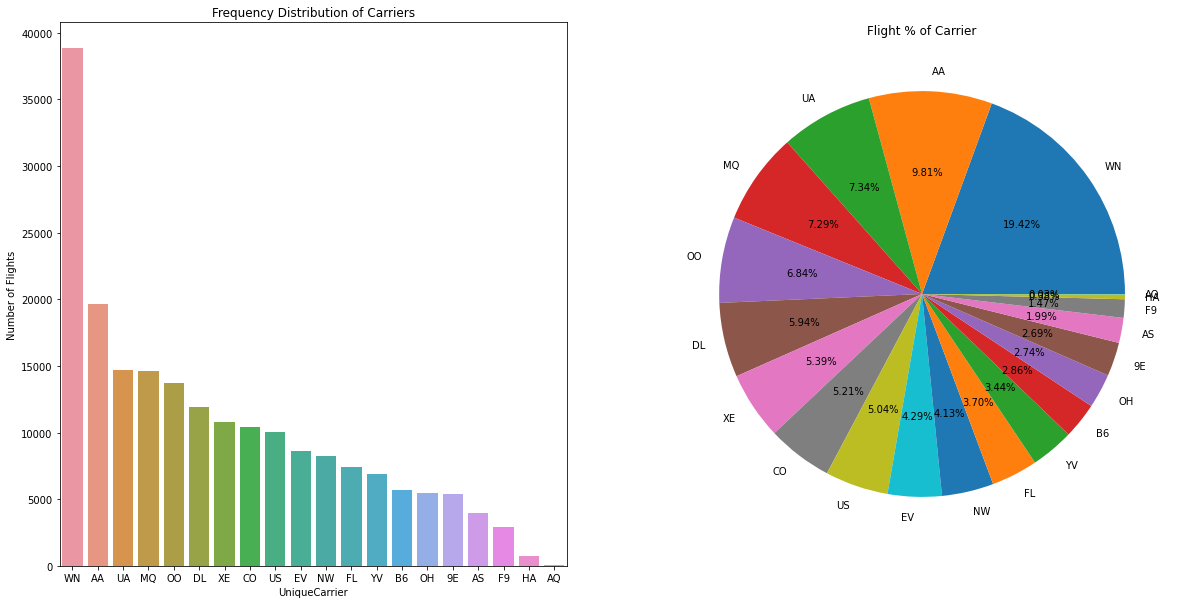

In [108]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df['UniqueCarrier'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                  
ax[1].set_title('Flight % of Carrier')
ax[1].set_ylabel('')
sns.countplot('UniqueCarrier',order = df['UniqueCarrier'].value_counts().index, data=df,ax=ax[0])
ax[0].set_title('Frequency Distribution of Carriers')
ax[0].set_ylabel('Number of Flights')
plt.show()

Create a plot showing frequency distribution and percentage of flights by carrier 

Show a correlation matrix to help understand the data

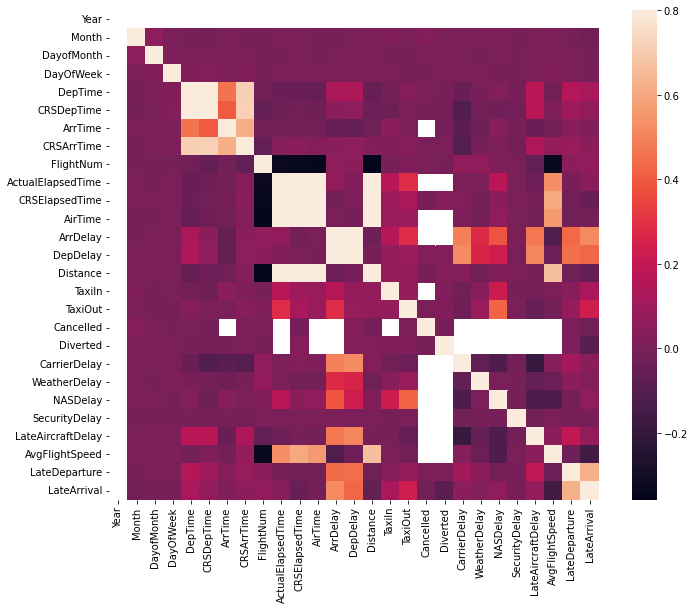

In [109]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()




Through the correlation matrix we can see how some of the 29 variables in the dataset can be linearly predicted from the others. In order to have a better analysis and work with a lighter dataset, we are going to delete some of those unwanted variables and create new ones.


Convert columns 'Year', 'Month' and 'DayOfMonth' to column 'DepDate' in year/month/date format 

In [110]:
df['DepDate'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')

In order to categorize the arrival  status of the flights,  five diferent categories named `Status' will be created representing whether the flight was on time (inside  a 15 minutes period  = 0), slightly delayed (between 15 and 60 min  = 1), highly delayed (more than 60 min = 2), diverted (3), or cancelled (4)

In [111]:
for dataset in df:
    df.loc[df['ArrDelay'] <= 15, 'Status'] = 0
    df.loc[df['ArrDelay'] >= 15, 'Status'] = 1
    df.loc[df['ArrDelay'] >= 60, 'Status'] = 2
    df.loc[df['Diverted'] == 1, 'Status'] = 3
    df.loc[df['Cancelled'] == 1, 'Status'] = 4

Drop unwanted data

In [112]:
df = df.drop("Year",1) #Converted to date
df = df.drop("DayofMonth",1) #Converted to date
df = df.drop("DepTime",1) #Of the departure data we only keep the expected 
df = df.drop("DepDelay",1)
df = df.drop("ArrTime",1)
df = df.drop("CRSArrTime",1)
df = df.drop("ActualElapsedTime",1)
df = df.drop("CRSElapsedTime",1)
df = df.drop("Diverted",1)
df = df.drop("Cancelled",1)
df = df.drop("Distance",1)
df = df.drop("FlightNum",1)
df = df.drop("TailNum",1)
df = df.drop("AvgFlightSpeed",1)

<ipython-input-112-345f9b409785>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("Year",1) #Converted to date
<ipython-input-112-345f9b409785>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("DayofMonth",1) #Converted to date
<ipython-input-112-345f9b409785>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("DepTime",1) #Of the departure data we only keep the expected
<ipython-input-112-345f9b409785>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("DepDelay",1)
<ipython-input-112-345f9b409785>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argu

Display Status plot representing whether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


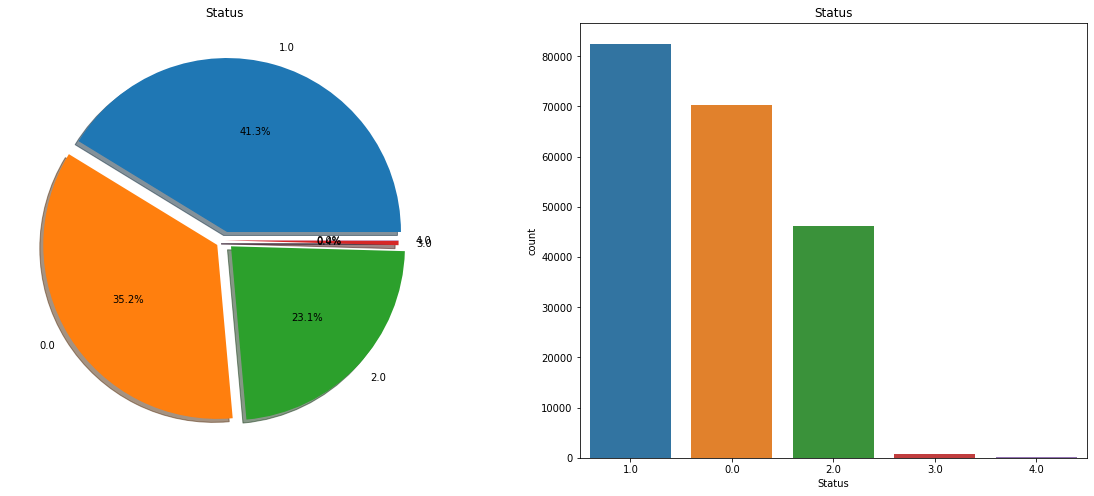

Status represents whether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)


In [113]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = df['Status'].value_counts().index, data=df,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents whether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')


64,4% of domestic flights were delayed by more than 15 minutes. 35,8% of them (or 23,1% of total fligths) had delays of more than one hour. Another different interpretation is that 76,5% of flights have delay of one hour or less.
On the other hand, just a 0,03% of flights were cancelled and 0,4% were diverted.

Select delayed flights represented by statuses slightly delayed (1) and highly delayed (2).

In [114]:
Delayedflights = df[(df.Status >= 1) &(df.Status < 3)]
Delayedflights

,Month,DayOfWeek,CRSDepTime,UniqueCarrier,AirTime,ArrDelay,Origin,Dest,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,LateDeparture,LateArrival,DepDate,Status
635322,4,4,2006,UA,83.0,47.0,SFO,PDX,4.0,19.0,N,0.0,0.0,6.0,0.0,41.0,True,True,2008-04-24,1.0
1805141,12,2,1223,OO,18.0,34.0,MRY,SFO,4.0,18.0,N,0.0,0.0,0.0,0.0,34.0,True,True,2008-12-02,1.0
138827,1,7,1320,9E,38.0,27.0,MSP,FSD,3.0,15.0,N,27.0,0.0,0.0,0.0,0.0,True,True,2008-01-20,1.0
50656,1,6,1650,OH,156.0,26.0,CVG,SAT,3.0,38.0,N,10.0,0.0,16.0,0.0,0.0,False,True,2008-01-26,1.0
1514725,9,5,2235,B6,39.0,21.0,JFK,BOS,3.0,49.0,N,9.0,0.0,12.0,0.0,0.0,False,True,2008-09-05,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832690,5,7,1340,MQ,131.0,17.0,JAX,ORD,6.0,13.0,N,0.0,5.0,0.0,0.0,12.0,True,True,2008-05-11,1.0
701260,4,7,1610,AA,174.0,70.0,DFW,SAN,5.0,26.0,N,13.0,0.0,15.0,0.0,42.0,True,True,2008-04-06,2.0
723984,4,4,1515,DL,65.0,37.0,ATL,IND,8.0,36.0,N,0.0,0.0,12.0,0.0,25.0,True,True,2008-04-03,1.0
1226530,7,1,1425,AA,180.0,29.0,LGA,DFW,11.0,53.0,N,0.0,0.0,14.0,0.0,15.0,False,True,2008-07-21,1.0


Delayed flights as percentage of total scheduled flights by carrier:

In [115]:
flights_scheduled_by_carrier_count = df['UniqueCarrier'].value_counts()
flights_scheduled_by_carrier_count
delayed_flights_by_carrier_count = Delayedflights['UniqueCarrier'].value_counts()
delayed_flights_by_carrier_count
percentage_of_delayed_flights_by_carrier = (delayed_flights_by_carrier_count/flights_scheduled_by_carrier_count)*100
percentage_of_delayed_flights_by_carrier


9E    68.984753
AA    69.228024
AQ    53.623188
AS    61.063723
B6    70.260353
CO    58.793054
DL    63.503957
EV    68.626994
F9    56.262764
FL    65.397597
HA    55.131579
MQ    68.899554
NW    68.496304
OH    75.273723
OO    67.631156
UA    66.955100
US    59.855029
WN    53.948148
XE    69.277891
YV    75.480210
Name: UniqueCarrier, dtype: float64

Convert series to numpy array:

In [116]:
flights_scheduled_by_carrier_count.to_numpy()


array([38841, 19612, 14677, 14585, 13686, 11878, 10774, 10423, 10071,
        8587,  8253,  7407,  6872,  5723,  5480,  5378,  3986,  2938,
         760,    69])

In [117]:
delayed_flights_by_carrier_count.to_numpy()

array([20954, 13577, 10049,  9827,  9256,  7543,  7464,  6128,  6028,
        5893,  5653,  5187,  4844,  4125,  4021,  3710,  2434,  1653,
         419,    37])

In [118]:
percentage_of_delayed_flights_by_carrier.to_numpy()

array([68.9847527 , 69.22802366, 53.62318841, 61.06372303, 70.26035296,
       58.79305382, 63.5039569 , 68.62699429, 56.26276378, 65.39759687,
       55.13157895, 68.89955434, 68.49630437, 75.27372263, 67.63115593,
       66.95509982, 59.85502929, 53.94814758, 69.27789122, 75.48020955])

Show Frequency Distribution of Delayed Flights by Carrier as a barchart and percentage of Delayed Flights by Carrier

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


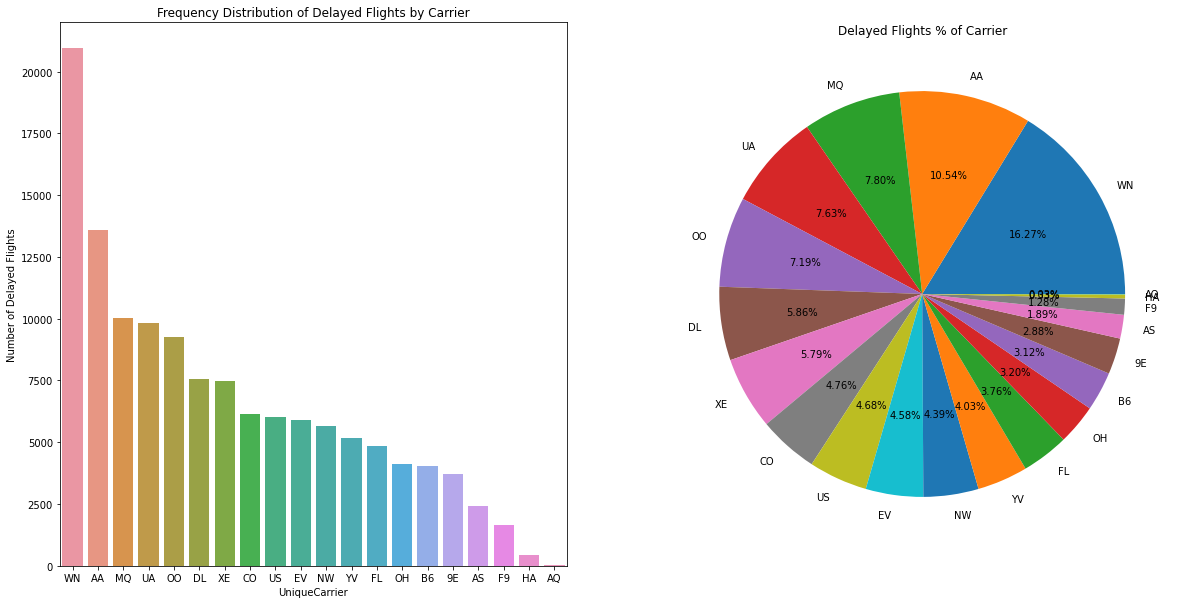

In [119]:
f,ax=plt.subplots(1,2,figsize=(20,10))
delayed_flights_by_carrier_count.plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                  
ax[1].set_title('Delayed Flights % of Carrier')
ax[1].set_ylabel('')
sns.countplot('UniqueCarrier',order = delayed_flights_by_carrier_count.index, data=Delayedflights,ax=ax[0])
ax[0].set_title('Frequency Distribution of Delayed Flights by Carrier')
ax[0].set_ylabel('Number of Delayed Flights')
plt.show()

Show Percentage of Delayed over total Flights by Carrier as piechart in order to see if any of the oeprators have a significant value.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


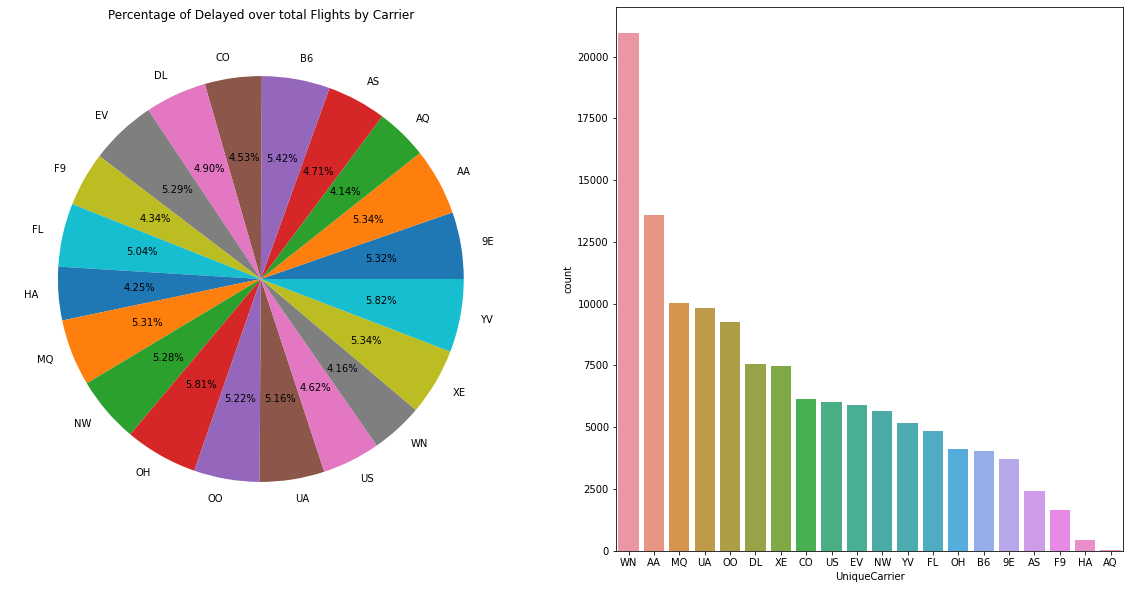

In [120]:
f,ax=plt.subplots(1,2,figsize=(20,10))
percentage_of_delayed_flights_by_carrier.plot.pie(autopct='%1.2f%%',ax=ax[0],shadow=False)                                                  
ax[0].set_title('Delayed Flights % of Carrier')
sns.countplot('UniqueCarrier',order = delayed_flights_by_carrier_count.index, data=Delayedflights,ax=ax[1])
ax[0].set_title('Percentage of Delayed over total Flights by Carrier')
ax[0].set_ylabel('')
plt.show()

It can be seen that one of them is close to 6% while other is less than 4%

Scatter plot showing correlation between number of flights scheduled and number of delayed flights by carrier. The relationship seems quite linear, so it can be said that there is no carrier with a significant percentage 

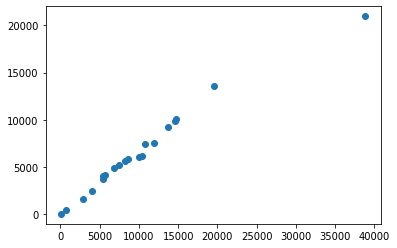

In [121]:
x = flights_scheduled_by_carrier_count
y = delayed_flights_by_carrier_count

plt.scatter(x, y)
plt.show()

In [122]:
Delayedflights[['ArrDelay','LateDeparture', 'UniqueCarrier']]

,ArrDelay,LateDeparture,UniqueCarrier
635322,47.0,True,UA
1805141,34.0,True,OO
138827,27.0,True,9E
50656,26.0,False,OH
1514725,21.0,False,B6
...,...,...,...
832690,17.0,True,MQ
701260,70.0,True,AA
723984,37.0,True,DL
1226530,29.0,False,AA


<ipython-input-123-37fb6fca1c21>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df2.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()


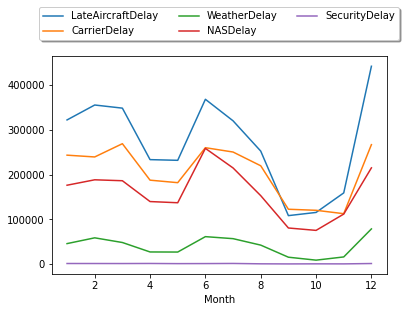

In [123]:
df2 = Delayedflights.filter(['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
df2 = df2.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()

The graph identifies three main variables for delays: Late Aircraft Delay, Carrier Delay and NAS Delay, showing how those three variables create most of delays during the year. Late Aircraft Delay seems to be the most important variable

Show number of flghts delayed by carrier

In [124]:
print(df['UniqueCarrier'].value_counts())

WN    38841
AA    19612
UA    14677
MQ    14585
OO    13686
DL    11878
XE    10774
CO    10423
US    10071
EV     8587
NW     8253
FL     7407
YV     6872
B6     5723
OH     5480
9E     5378
AS     3986
F9     2938
HA      760
AQ       69
Name: UniqueCarrier, dtype: int64


Display a plot showing average delay and distribution of delayed flights by carrier

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


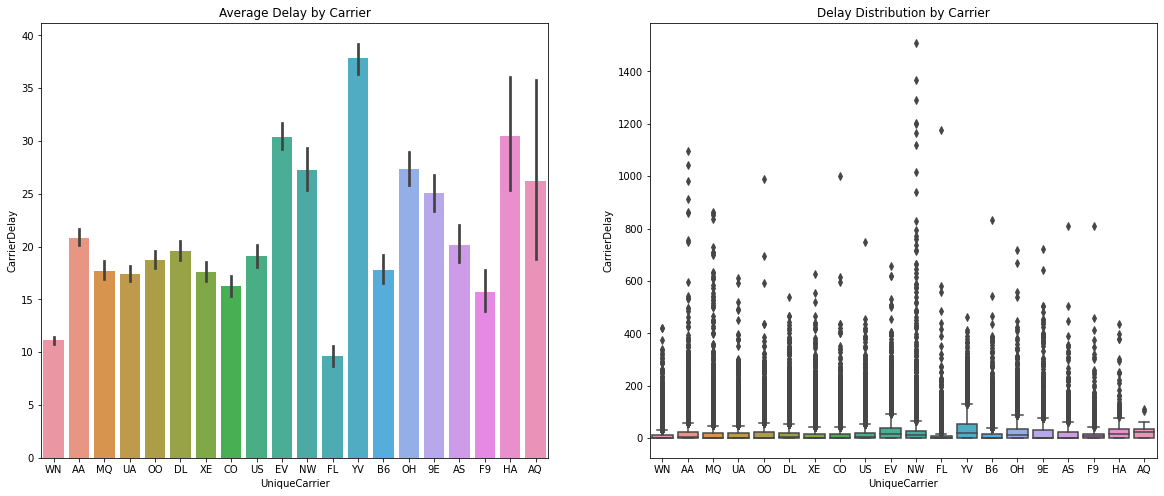

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [125]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('UniqueCarrier','CarrierDelay', data=Delayedflights,ax=ax[0], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[0].set_title('Average Delay by Carrier')
sns.boxplot('UniqueCarrier','CarrierDelay', data=Delayedflights,ax=ax[1], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[1].set_title('Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines','US: US Airways',
       'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])


It can be seen that some of the biggest operators show the least average delays (like 'WN: Southwest Airlines' with nearly 20% of the total flights and an average 11 min delay per flight), while other smaller carriers show the gratest avg delays (like 'YV: Mesa Airlines', with nearly 40 min avg delay per flight  with only 3.43% of the total market).

### - Exercise 3

Export the dataset clean and with the new columns to Excel.

In [128]:
df.to_csv('mydataframe.csv', sep='\t')

In [129]:
df.to_csv('/content/drive/My Drive/Delayed_Flights_processed.csv', encoding='utf-8', index=False)